<a href="https://colab.research.google.com/github/alirezakavianifar/machineLearning/blob/main/zscore_remove_outliers_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix
import io
import requests
from tensorflow import keras
import numpy as np

In [17]:
url="https://github.com/codebasics/py/raw/master/ML/FeatureEngineering/2_outliers_z_score/Exercise/bhp.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [18]:
print(df.price_per_sqft.min())
print(df.price_per_sqft.max())
print(df.price_per_sqft.std())

267
12000000
106727.16032810845


In [19]:
df['price_per_sqft_zscore'] = (df['price_per_sqft'] - df['price_per_sqft'].mean())/df['price_per_sqft'].std()

In [20]:
df.shape

(13200, 8)

In [21]:
df = df[~((df['price_per_sqft_zscore']>3) | (df['price_per_sqft_zscore'] < -3))]

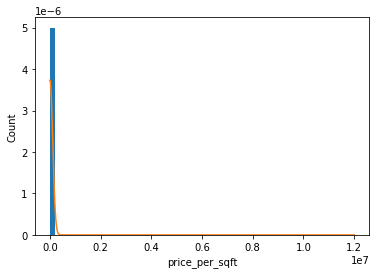

In [3]:
from scipy.stats import norm

plt.hist(df.price_per_sqft, bins=60, rwidth=2, density=True)
plt.xlabel("price_per_sqft")
plt.ylabel('Count')

rng = np.arange(df.price_per_sqft.min(), df.price_per_sqft.max(), 0.1)
plt.plot(rng, norm.pdf(rng, df.price_per_sqft.mean(), df.price_per_sqft.std()))